# Is Beyonder the Most Powerful Superhero Character?

Who is the most powerful superhero? This question inevitably stirs controversies among fans of comics and animation. But judging from tabular and textual data from the SuperHeroDb (SHDb), it turns out Beyonder should claim the crown.

In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 24.8 MB 4.1 MB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.2 which is incompatible.
featuretools 1.4.1 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
df=pd.read_csv('../input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')
df

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Zatanna,Zatanna Zatara,Zatanna Zatara,10,Zatanna is the daughter of adventurer John Zat...,Zatanna is genetically talented with her magi...,90,10,25,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446,Zero,DWN-∞: Zero,DWN-∞: Zero,18,Zero was created by the late Dr. Albert Wily ...,NaN,80,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1447,Zoom (New 52),Hunter Zolomon,NaN,20,"Hunter Zolomon is better known as Zoom, a spee...",After tricking Barry Allen and Wally West into...,95,50,100,75,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1448,Zoom,Hunter Zolomon,Hunter Zolomon,9,Hunter Zolomon had a troubled relationship wi...,"Zoom is able to alter time, to make himself ev...",75,10,100,30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df.isnull().sum().head(35)

name                              2
real_name                       149
full_name                       494
overall_score                     0
history_text                     90
powers_text                     364
intelligence_score                0
strength_score                    0
speed_score                       0
durability_score                  0
power_score                       0
combat_score                      0
superpowers                       0
alter_egos                        0
aliases                           0
place_of_birth                  662
first_appearance                203
creator                         139
alignment                        82
occupation                      436
base                            572
teams                             0
relatives                       549
gender                          145
type_race                       407
height                            2
weight                            2
eye_color                   

At first glance, the answer should be straight forward. The dataset does list the overall scores, which represents SHDb's assessment of the overall power of each character. But one tricky point is the overall_score column has mixed data types. Apart from numerical values, it has 107 characters listed as "-", presumably meaning "not available", and 18 characters marked as "∞", meaning having infinite power. If we rank the values directly, it would be ordered as strings, with "∞" at the top, followed by "94", "9", "89", "87". For convenience of processing and visualization, I turn them all into numerical values. As the original numerical values range from 1 to 237, I set "-" to 0, and "∞" to 299.

In [6]:
df.groupby(['overall_score'])['overall_score'].count()

overall_score
-      107
1        2
10      81
100      1
108      1
      ... 
87       1
89       1
9       99
94       1
∞       18
Name: overall_score, Length: 93, dtype: int64

In [7]:
df.overall_score.sort_values(ascending=False).head(20)

153      ∞
450      ∞
1337     ∞
845      ∞
1202     ∞
174      ∞
482      ∞
11       ∞
795      ∞
1272     ∞
803      ∞
1281     ∞
809      ∞
1289     ∞
376      ∞
882      ∞
1290     ∞
526      ∞
1143    94
728      9
Name: overall_score, dtype: object

In [8]:
df.loc[df.overall_score.str.isnumeric()].overall_score.astype('int32').sort_values(ascending=False)

538    237
393    229
527    226
110    222
421    211
      ... 
259      2
758      2
292      2
994      1
129      1
Name: overall_score, Length: 1325, dtype: int32

In [9]:
top_score = 299
def overall_score_transform(x):
    if x=="-":
        t=0
    elif x=="∞":
        t=top_score
    else:
        t=int(x)
    return t

In [10]:
df['overall_score']=df.apply(lambda r: overall_score_transform(r['overall_score']), axis=1)

# Ranking the Infinite Scored Characters by Power Stats and Superpower Counts

So the most powerful character should be among the 18 who have infinite power. But how can we rank infinity? A handy way is to look into auxiliary features. In the dataset there are two sets which can be useful. The first is the six power statistics (intelligence_score, strength_score, speed_score, durability_score, power_score and combat_score), which range from 0 to 100. I add them together to get a "combined_score" to summarize them. The second is to count the number of superpowers listed in "superpowers" column that each character possesses.

In [11]:
import ast
df['superpower_count']=df.apply(lambda r: len(ast.literal_eval(r['superpowers'])), axis=1)

In [12]:
df['combined_score']=df.intelligence_score + df.strength_score + df.speed_score + df.durability_score + df.power_score + df.combat_score

In [13]:
df.alignment.fillna('not available', inplace=True)
df.name.fillna('not available', inplace=True)

But now we have two ways to rank the infinite class, the first is to rank their combined scores first, if equal then rank their superpower counts. It would make Golden Master's Mech from LEGO's Ninjago the most powerful character, who have perfect power scores and 106 types of superpowers. On the other hand, if we give priority to superpower counts over combined scores, Black Alice from DC Comics would rank first. Her combined score is 565 out of 600, but has 126 types of superpower listed. In fact her only superpower that matters but not clearly listed is that she can temporarily usurp the magical powers of any being.

In [14]:
df[df.overall_score==top_score].sort_values(['combined_score','superpower_count'], ascending=[False,False])

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,superpower_count,combined_score
526,Golden Master's Mech,Overlord,NaN,299,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,106,600
1337,True Form Oblivion,Oblivion,Oblivion,299,NaN,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103,600
1281,The Golden Master,Overlord,Overlord,299,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,97,600
809,Living Tribunal,NaN,NaN,299,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,86,600
482,First Spinjitzu Master,Unknown,Unknown,299,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,84,600
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,299,"Many years ago, during Lucifer's rebellion in ...",The archangel Michael Demuirgos is the second ...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,600
803,Little Krishna,Krishna,Krishna,299,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,67,600
1290,The One Below All,Unknown,NaN,299,NaN,The One Below All is the source of the mutagen...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,57,600
845,Man Of Miracles,Mother Of Existence,Mother Of Existence,299,The being known as Mother is the creator of t...,NaN,100,100,100,100,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,54,600
450,Eru Iluvatar,Eru,NaN,299,Eru is the supreme deity of Arda. He was the s...,NaN,100,100,100,100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28,600


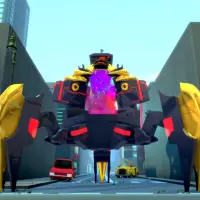

In [15]:
Golden_Masters_Mech_img = "https://www.superherodb.com/gallery2/025/76/7695.webp"

import requests
import IPython.display as Disp
Disp.Image(requests.get(Golden_Masters_Mech_img).content)

In [16]:
df[df.overall_score==top_score].sort_values(['superpower_count','combined_score'], ascending=[False,False])

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,superpower_count,combined_score
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,126,565
526,Golden Master's Mech,Overlord,NaN,299,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,106,600
1337,True Form Oblivion,Oblivion,Oblivion,299,NaN,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103,600
1281,The Golden Master,Overlord,Overlord,299,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,97,600
153,Beyonder,NaN,NaN,299,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,89,590
809,Living Tribunal,NaN,NaN,299,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,86,600
482,First Spinjitzu Master,Unknown,Unknown,299,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,84,600
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,299,"Many years ago, during Lucifer's rebellion in ...",The archangel Michael Demuirgos is the second ...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,600
1202,Spectre Oversoul,Aztar,Aztar,299,NaN,"As a servant of God, The Spectre is granted l...",100,100,100,100,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,71,580
803,Little Krishna,Krishna,Krishna,299,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,67,600


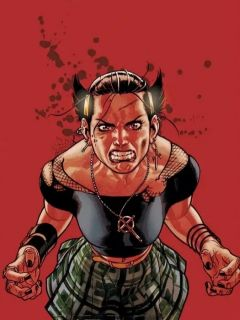

In [17]:
Black_Alice = df.query("name == 'Black Alice'")
Black_Alice_img = "https://www.superherodb.com" + Black_Alice['img'].values[0]
Disp.Image(requests.get(Black_Alice_img).content)

Does ranking by combined score or superpower counts follow the internal logic of the database? If we do a scatter plot of the overall score against the combined score, we can see most of the characters have overall scores less than 50, no matter how high their combined scores. Among characters who have perfect power stats, the overall scores vary from 27 to 299(infinite). And among the infinite class, the combined score can be as low as 550. 

In [18]:
fig1 = px.scatter(df, y=df.overall_score, x=df.combined_score, size=df.superpower_count, color=df.alignment,
                 hover_data=['name'])
fig1.show()

And the scatter plot of the overall score against superpower counts shows that, though in general characters who have more types of superpowers have higher overall scores, there is a large divergence in overall scores. Characters in the infinite class have 23 to 126 types of superpowers.

In [19]:
fig2 = px.scatter(df, y=df.overall_score, x=df.superpower_count, size=df.overall_score, color=df.alignment,
                 hover_data=['name'], trendline="ols", trendline_color_override='red', trendline_scope="overall")
fig2.show()

# The Exclusive Superpowers of the Infinite Class

So we can infer that the most important factor of the overall score of a character is not power stats or number of superpowers, but the type of superpowers he or she possesses, and evidently not every type of superpower is equal in its contribution to the overall score. Here lies another tricky point. The creators of this dataset have done one-hot-encoding to the superpowers, but only kept the 50 most common types. If we want to know what superpowers make a character has infinite power, we should look at the rare ones they have. So we have to go back to the "superpowers" column and do one-hot-encoding all over.

In [20]:
df['superpowers']=df.apply(lambda r: ast.literal_eval(r['superpowers']), axis=1)

In [21]:
df_superpowers = (
    df["superpowers"].apply(pd.Series).stack().pipe(pd.get_dummies).groupby(level=0).sum()
)
df_superpowers.columns = df_superpowers.columns.str.lower().str.replace(" ", "_")
df_superpowers = df_superpowers.add_prefix("has_")

In [22]:
df_superpowers

,has_ability_shift,has_absorption,has_acausality,has_accelerated_development,has_accelerated_healing,has_acrobatics,has_adaptation,has_afterimage_creation,has_age_manipulation,has_agility,...,has_water_control,has_weapon_creation,has_weapon-based_powers,has_weapons_master,has_weather_control,has_web_creation,has_willpower_inducement,has_willpower_manipulation,has_wind_control,has_wishing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1446,0,0,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1447,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
selected_columns=['name', 'overall_score','intelligence_score','strength_score','speed_score','durability_score','power_score','combat_score']
heropower=df[selected_columns].join(df_superpowers)

In [24]:
heropower.fillna(0, inplace=True)

In [25]:
heropower.isnull().sum().head(35)

name                           0
overall_score                  0
intelligence_score             0
strength_score                 0
speed_score                    0
durability_score               0
power_score                    0
combat_score                   0
has_ability_shift              0
has_absorption                 0
has_acausality                 0
has_accelerated_development    0
has_accelerated_healing        0
has_acrobatics                 0
has_adaptation                 0
has_afterimage_creation        0
has_age_manipulation           0
has_agility                    0
has_animal_attributes          0
has_animal_control             0
has_animal_oriented_powers     0
has_animated_shadow            0
has_animation                  0
has_anti-gravity               0
has_antimatter_manipulation    0
has_apathy                     0
has_apotheosis                 0
has_astral_projection          0
has_astral_trap                0
has_astral_travel              0
has_attack

In [26]:
infinite=heropower[heropower.overall_score==top_score]
non_infinite=heropower[heropower.overall_score!=top_score]

In [27]:
infinite_sums=infinite.drop(selected_columns, axis=1).sum(axis=0)
non_infinite_sums=non_infinite.drop(selected_columns, axis=1).sum(axis=0)

In [28]:
infinite_power=infinite_sums[(infinite_sums>0) & (non_infinite_sums==0)]

In [29]:
infinite_power

has_apotheosis                1.0
has_omnipotent                4.0
has_orbing                    1.0
has_salvation                 1.0
has_willpower_manipulation    1.0
dtype: float64

A comparison of the superpowers that the infinite and the non-infinite class possess shows that, omnipotent, apotheosis, orbing, salvation and willpower manipulation are the five superpowers exclusively possessed by the infinite class. Among the five one, omnipotent, which means unlimited power, is possessed by four of the characters which have infinite power. They are Abraxas, Eru Iluvatar, Life Entity and The Lord of Light, respectively the supreme being in Marvel, J.R.R. Tolkien, DC Comics and George R. R. Martin's universe. The other four types of exclusive superpowers record only a single instance each, and are less certain to be the sufficient conditions of infinite power.

In [30]:
infinite[infinite.has_omnipotent==1]

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_ability_shift,has_absorption,...,has_water_control,has_weapon_creation,has_weapon-based_powers,has_weapons_master,has_weather_control,has_web_creation,has_willpower_inducement,has_willpower_manipulation,has_wind_control,has_wishing
11,Abraxas,299,100,100,100,100,100,100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,Eru Iluvatar,299,100,100,100,100,100,100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,Life Entity,299,100,100,100,100,100,100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1289,The Lord Of Light,299,100,100,100,100,100,100,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df[heropower.has_omnipotent==1]['creator']

11            Marvel Comics
450        J. R. R. Tolkien
795               DC Comics
1289    George R. R. Martin
Name: creator, dtype: object

In [32]:
infinite[infinite.has_apotheosis==1]

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_ability_shift,has_absorption,...,has_water_control,has_weapon_creation,has_weapon-based_powers,has_weapons_master,has_weather_control,has_web_creation,has_willpower_inducement,has_willpower_manipulation,has_wind_control,has_wishing
174,Black Alice,299,95,100,100,85,100,85,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [33]:
infinite[infinite.has_orbing==1]

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_ability_shift,has_absorption,...,has_water_control,has_weapon_creation,has_weapon-based_powers,has_weapons_master,has_weather_control,has_web_creation,has_willpower_inducement,has_willpower_manipulation,has_wind_control,has_wishing
174,Black Alice,299,95,100,100,85,100,85,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [34]:
infinite[infinite.has_salvation==1]

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_ability_shift,has_absorption,...,has_water_control,has_weapon_creation,has_weapon-based_powers,has_weapons_master,has_weather_control,has_web_creation,has_willpower_inducement,has_willpower_manipulation,has_wind_control,has_wishing
809,Living Tribunal,299,100,100,100,100,100,100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
infinite[infinite.has_willpower_manipulation==1]

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_ability_shift,has_absorption,...,has_water_control,has_weapon_creation,has_weapon-based_powers,has_weapons_master,has_weather_control,has_web_creation,has_willpower_inducement,has_willpower_manipulation,has_wind_control,has_wishing
882,Michael Demiurgos,299,100,100,100,100,100,100,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Ranking by Probability Score of Classification Model

As those exclusive superpowers only account for 7 of the 18 characters in the infinite class, we may conclude that, perhaps with the exception of omnipotent, what makes one has infinite power lies in the combinations of superpowers. To find out what are the responsible superpowers, we may use some machine learning classification model. I choose logistic regression for it's highly interpretable and it gives a probability score, which can be viewed as a measurement on who has more of the "infinite class superpowers".

In [36]:
X=heropower.drop(['name','overall_score'], axis=1)
y=pd.Series(heropower.overall_score==top_score).astype(int)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_columns=['intelligence_score','strength_score','speed_score','durability_score','power_score','combat_score']
ct= ColumnTransformer(transformers=[("num", StandardScaler(), numeric_columns)], remainder='passthrough')
lr = LogisticRegression(solver='liblinear', C=2.5, class_weight='balanced', random_state=42, max_iter=1000)
lrpipe = make_pipeline(ct, lr)
lrpipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['intelligence_score',
                                                   'strength_score',
                                                   'speed_score',
                                                   'durability_score',
                                                   'power_score',
                                                   'combat_score'])])),
                ('logisticregression',
                 LogisticRegression(C=2.5, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrpipe, X, y, scoring='f1', cv=5)
print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 f1 score with a standard deviation of 0.10


Since the purpose of this modeling is for analysis, not prediction, and the samples of infinite class are too few. I do not split the data into train and test sets, but cross validation shows it has a decent f1 score of 0.73. The coefficients of the model indicate that omnipotent is the most important factor, others include reality warping, vitakinesis, omnilingualism, matter absorption and so on, while strength score and combat score have moderate importance.

In [39]:
def feature_importance(x, model):
    feature_names = x.columns.values.tolist()
    coefs = model.coef_.flatten()
    zipped = zip(feature_names, coefs)
    df = pd.DataFrame(zipped, columns=["Feature", "Value"])
    df["Abs_value"] = df["Value"].apply(lambda x: abs(x))
    df["Colors"] = df["Value"].apply(lambda x: "green" if x > 0 else "red")
    df = df.sort_values("Abs_value", ascending=False)
    return df

def feature_plot(df):
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    sns.barplot(y="Feature", x="Value", data=df.head(20), palette=df.head(20)["Colors"])
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
    ax.set_title("Top 20 Features", fontsize=25)
    ax.set_xlabel("Coef", fontsize=22)
    ax.set_ylabel("Feature Name", fontsize=20)
    plt.show()

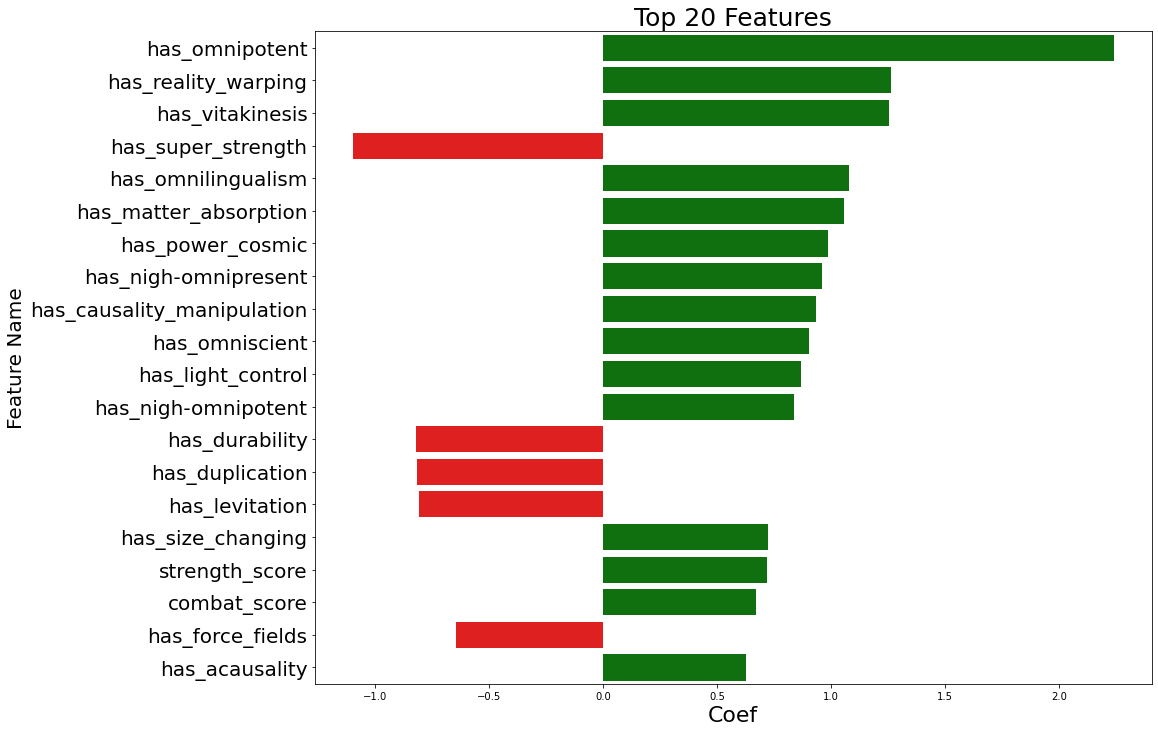

In [40]:
f=feature_importance(X, lr)
feature_plot(f)

In [41]:
df['infinity_score']=lrpipe.predict_proba(X)[:,1]

In [42]:
df.sort_values(['infinity_score'], ascending=False).head(30)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score
526,Golden Master's Mech,Overlord,NaN,299,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,106,600,0.999922
809,Living Tribunal,NaN,NaN,299,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,86,600,0.999716
153,Beyonder,NaN,NaN,299,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,89,590,0.999684
1337,True Form Oblivion,Oblivion,Oblivion,299,NaN,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103,600,0.999567
1202,Spectre Oversoul,Aztar,Aztar,299,NaN,"As a servant of God, The Spectre is granted l...",100,100,100,100,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,71,580,0.999486
803,Little Krishna,Krishna,Krishna,299,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,67,600,0.999364
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,299,"Many years ago, during Lucifer's rebellion in ...",The archangel Michael Demuirgos is the second ...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,600,0.999178
1289,The Lord Of Light,R'hllor,NaN,299,"Melisandre, a Red Priestess of the Lord of Lig...",NaN,100,100,100,100,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,600,0.998687
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,126,565,0.998575
845,Man Of Miracles,Mother Of Existence,Mother Of Existence,299,The being known as Mother is the creator of t...,NaN,100,100,100,100,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,54,600,0.998526


In [43]:
df.loc[526,'superpowers']

['Absorption',
 'Acausality',
 'Accelerated Healing',
 'Age Manipulation',
 'Agility',
 'Animal Control',
 'Anti-Gravity',
 'Audio Control',
 'Biokinesis',
 'Bullet Time',
 'Clairvoyance',
 'Cold Resistance',
 'Creation',
 'Cryokinesis',
 'Darkforce Manipulation',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Durability',
 'Electrokinesis',
 'Element Control',
 'Endurance',
 'Energy Absorption',
 'Energy Beams',
 'Energy Blasts',
 'Energy Manipulation',
 'Energy Resistance',
 'Enhanced Hearing',
 'Enhanced Memory',
 'Enhanced Senses',
 'Enhanced Sight',
 'Enhanced Smell',
 'Enhanced Touch',
 'Existence Erasure',
 'Fire Control',
 'Fire Resistance',
 'Flight',
 'Force Fields',
 'Gravity Control',
 'Heat Resistance',
 'Illusions',
 'Immortality',
 'Insanity',
 'Intangibility',
 'Intelligence',
 'Invisibility',
 'Invulnerability',
 'Life Manipulation',
 'Light Control',
 'Longevity',
 'Magic Resistance',
 'Marksmanship',
 'Matter Absorption',
 'Matter Manipulation',
 'Mind Blast',
 '

The probability scores of the 18 infinite class characters are very close, from 0.987650 to 0.999922, where Golden Master's Mech edges out at the top. While the Mech does not have omnipotent, it has important superpowers like reality warping, matter absorption, nigh-Omnipotent and nigh-omnipresent.

# Scoring From Regression Model

Another approach is to do a regression to approximate the formula or algorithm the SHDb used to calculate the overall scores, then extrapolate into the characters of the infinite class. Linear regression is chosen for its interpretability, and Elastic-net regulation is used to reduce the number of zero coefficients, which should be closer to the case.

In [44]:
X2=heropower[heropower.overall_score > 0]
X2=heropower.drop(['name','overall_score'], axis=1)
y2=heropower['overall_score']

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVR

linreg=ElasticNet(positive=True, alpha=0.001, l1_ratio=0.6, random_state=42)
reg = make_pipeline(ct, linreg)
reg.fit(X2, y2)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['intelligence_score',
                                                   'strength_score',
                                                   'speed_score',
                                                   'durability_score',
                                                   'power_score',
                                                   'combat_score'])])),
                ('elasticnet',
                 ElasticNet(alpha=0.001, l1_ratio=0.6, positive=True,
                            random_state=42))])

In [46]:
reg.score(X2,y2)

0.9653507646549471

In [47]:
scores2 = cross_val_score(reg, X2, y2, scoring='neg_root_mean_squared_error', cv=5)
print("%0.2f RMSE with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

-12.24 RMSE with a standard deviation of 1.86


The possibility that SHDb's formula has interactions of variables, and the arbitrary setting of 299 overall scores for the infinite class should limit the accuracy of the linear model. But the Elastic-net model has a R squared score of 0.965, and in cross validation has a root mean squared error of 12.24, should be regarded as decent. In this model omnipotent has a weight of near 160 points in the overall score, while other high scoring superpowers include nigh-omnipotent, omniscient, causality_manipulation and so on.

In [48]:
pd.DataFrame({
    'variable': [c for c in X2.columns], 
    'coefficient': [round(x,2) for x in linreg.coef_]
}) \
  .sort_values('coefficient', ascending=False) \
  .style.bar(color=['grey', 'lightblue'], align='zero')

,variable,coefficient
174,has_omnipotent,159.400000
164,has_nigh-omnipotent,54.370000
176,has_omniscient,39.570000
40,has_causality_manipulation,31.210000
185,has_phoenix_force,29.950000
24,has_apotheosis,29.380000
178,has_orbing,29.370000
166,has_nigh-omniscient,26.550000
196,has_power_cosmic,26.420000
23,has_apathy,23.480000


In [49]:
df['projected_score']=reg.predict(X2)

In [50]:
df.sort_values(by='projected_score', ascending=False).head(20)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score,projected_score
450,Eru Iluvatar,Eru,NaN,299,Eru is the supreme deity of Arda. He was the s...,NaN,100,100,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,28,600,0.998188,338.551547
153,Beyonder,NaN,NaN,299,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,0.0,1.0,0.0,0.0,1.0,1.0,89,590,0.999684,329.220913
1337,True Form Oblivion,Oblivion,Oblivion,299,NaN,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,103,600,0.999567,321.815309
526,Golden Master's Mech,Overlord,NaN,299,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,0.0,106,600,0.999922,311.438838
809,Living Tribunal,NaN,NaN,299,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,0.0,1.0,1.0,0.0,1.0,1.0,86,600,0.999716,303.324517
845,Man Of Miracles,Mother Of Existence,Mother Of Existence,299,The being known as Mother is the creator of t...,NaN,100,100,100,100,...,1.0,1.0,0.0,1.0,1.0,1.0,54,600,0.998526,293.784491
803,Little Krishna,Krishna,Krishna,299,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,1.0,1.0,0.0,1.0,1.0,1.0,67,600,0.999364,291.181162
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,299,"Many years ago, during Lucifer's rebellion in ...",The archangel Michael Demuirgos is the second ...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,71,600,0.999178,287.825036
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,1.0,1.0,0.0,0.0,1.0,1.0,126,565,0.998575,281.092794
1289,The Lord Of Light,R'hllor,NaN,299,"Melisandre, a Red Priestess of the Lord of Lig...",NaN,100,100,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,26,600,0.998687,277.686352


In [51]:
df.loc[450,'superpowers']

['Death Touch',
 'Element Control',
 'Elemental Transmogrification',
 'Empathy',
 'Energy Constructs',
 'Energy Manipulation',
 'Force Fields',
 'Gravity Control',
 'Illumination',
 'Illusions',
 'Immortality',
 'Intelligence',
 'Invisibility',
 'Matter Manipulation',
 'Mind Control',
 'Molecular Manipulation',
 'Nigh-Omnipotent',
 'Nigh-Omnipresent',
 'Nigh-Omniscient',
 'Omnipotent',
 'Omnipresent',
 'Omniscient',
 'Omnitrix',
 'Plant Control',
 'Precognition',
 'Probability Manipulation',
 'Resurrection',
 'Telepathy']

In [52]:
df.loc[153,'superpowers']

['Acausality',
 'Accelerated Healing',
 'Age Manipulation',
 'Agility',
 'Astral Projection',
 'Astral Trap',
 'Camouflage',
 'Causality Manipulation',
 'Conceptual Manipulation',
 'Darkforce Manipulation',
 'Death Manipulation',
 'Death Touch',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Dream Manipulation',
 'Dream Manipulation',
 'Durability Negation',
 'Element Control',
 'Energy Absorption',
 'Energy Blasts',
 'Energy Constructs',
 'Energy Manipulation',
 'Energy Resistance',
 'Existence Erasure',
 'Fate Manipulation',
 'Fear Manipulation',
 'Fire Control',
 'Flight',
 'Force Fields',
 'Heat Resistance',
 'Higher Dimensional Manipulation',
 'Holy Manipulation',
 'Illusions',
 'Immortality',
 'Insanity',
 'Intangibility',
 'Intelligence',
 'Invisibility',
 'Invulnerability',
 'Law Manipulation',
 'Life Manipulation',
 'Longevity',
 'Matter Manipulation',
 'Memory Manipulation',
 'Molecular Combustion',
 'Molecular Dissipation',
 'Molecular Immobilization',
 'Molecular Manipu

In [53]:
df.loc[1337,'superpowers']

['Accelerated Healing',
 'Adaptation',
 'Age Manipulation',
 'Agility',
 'Animal Control',
 'Animation',
 'Astral Projection',
 'Astral Travel',
 'Biokinesis',
 'Camouflage',
 'Causality Manipulation',
 'Chaos Magic',
 'Conceptual Manipulation',
 'Creation',
 'Darkforce Manipulation',
 'Death Manipulation',
 'Death Touch',
 'Density Control',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Dream Manipulation',
 'Dream Manipulation',
 'Duplication',
 'Durability',
 'Elasticity',
 'Electrokinesis',
 'Element Control',
 'Empathy',
 'Energy Absorption',
 'Energy Beams',
 'Energy Blasts',
 'Energy Constructs',
 'Energy Manipulation',
 'Entropy Projection',
 'Existence Erasure',
 'Fate Manipulation',
 'Fire Control',
 'Flight',
 'Force Fields',
 'Gravity Control',
 'Grim Reaping',
 'Heat Generation',
 'Higher Dimensional Manipulation',
 'Hypnokinesis',
 'Illumination',
 'Illusions',
 'Immortality',
 'Insanity',
 'Instinctive Reaction',
 'Intelligence',
 'Invisibility',
 'Invulnerability',

In [54]:
df.loc[526,'superpowers']

['Absorption',
 'Acausality',
 'Accelerated Healing',
 'Age Manipulation',
 'Agility',
 'Animal Control',
 'Anti-Gravity',
 'Audio Control',
 'Biokinesis',
 'Bullet Time',
 'Clairvoyance',
 'Cold Resistance',
 'Creation',
 'Cryokinesis',
 'Darkforce Manipulation',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Durability',
 'Electrokinesis',
 'Element Control',
 'Endurance',
 'Energy Absorption',
 'Energy Beams',
 'Energy Blasts',
 'Energy Manipulation',
 'Energy Resistance',
 'Enhanced Hearing',
 'Enhanced Memory',
 'Enhanced Senses',
 'Enhanced Sight',
 'Enhanced Smell',
 'Enhanced Touch',
 'Existence Erasure',
 'Fire Control',
 'Fire Resistance',
 'Flight',
 'Force Fields',
 'Gravity Control',
 'Heat Resistance',
 'Illusions',
 'Immortality',
 'Insanity',
 'Intangibility',
 'Intelligence',
 'Invisibility',
 'Invulnerability',
 'Life Manipulation',
 'Light Control',
 'Longevity',
 'Magic Resistance',
 'Marksmanship',
 'Matter Absorption',
 'Matter Manipulation',
 'Mind Blast',
 '

In [55]:
df.loc[174,'superpowers']

['Ability Shift',
 'Absorption',
 'Acausality',
 'Accelerated Healing',
 'Afterimage Creation',
 'Agility',
 'Animal Attributes',
 'Animal Control',
 'Animal Oriented Powers',
 'Animated Shadow',
 'Animation',
 'Anti-Gravity',
 'Apotheosis',
 'Astral Projection',
 'Astral Trap',
 'Astral Travel',
 'Audio Control',
 'Banish',
 'Chaos Magic',
 'Clairvoyance',
 'Cloaking',
 'Cold Resistance',
 'Conceptual Manipulation',
 'Cryokinesis',
 'Danger Sense',
 'Darkforce Manipulation',
 'Density Control',
 'Dimensional Awareness',
 'Dimensional Travel',
 'Dream Manipulation',
 'Dream Manipulation',
 'Electrokinesis',
 'Element Control',
 'Empathy',
 'Endurance',
 'Energy Absorption',
 'Energy Beams',
 'Energy Blasts',
 'Energy Constructs',
 'Energy Manipulation',
 'Enhanced Hearing',
 'Enhanced Memory',
 'Enhanced Senses',
 'Enhanced Sight',
 'Enhanced Smell',
 'Explosion Manipulation',
 'Fear Manipulation',
 'Fire Control',
 'Fire Resistance',
 'Flight',
 'Gravity Control',
 'Heat Resistance',


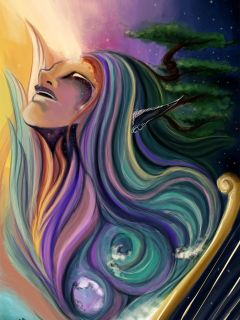

In [56]:
Eru_Iluvatar = df.query("name == 'Eru Iluvatar'")
Eru_Iluvatar_img = "https://www.superherodb.com" + Eru_Iluvatar['img'].values[0]
Disp.Image(requests.get(Eru_Iluvatar_img).content)

In this second model, the omnipotent, omnipresent and omniscient Eru Iluvatar get the highest score, Beyonder the second and Golden Master's Mech the fourth.

# Textual Description Score

As the two models have different results, we may find further clues from textual descriptions to determine who is most powerful. After a look at the descriptions of the 18 characters, I decide to use a term matcher to score powerfulness, with each mention of positive keywords get 1 point, and each mention of negative keywords get -1.5 point, on the ground that a mention of vulnerability hurts more on the status of invincibility than a mention of powerfulness. While this kind of word marcher cannot be very accurate, it serves as a rough estimation of the powerfulness in description.

The positive keywords are:
> "most powerful", "supreme", "ultimate", "omnipotence", "omnipotent", "immortality" ,"limitless", "unlimited" and "surpassing".

And the negative keyword are:
> "limited", "nigh-omnipotence", "second to", "defeated", "weakness", "weaknesses", "weaker", "destroyed", "destroy him", "destroying", "second most powerful" and "restricted".

In [57]:
df.fillna(value={'history_text':'NA', 'powers_text':'NA'}, inplace=True)
df['text']=df.history_text+' '+df.powers_text
hero_text=df[['name','text']]

In [58]:
pos_keyword=['most powerful','supreme','ultimate','omnipotence','omnipotent','immortality','limitless','unlimited','surpassing']
neg_keyword=['limited','nigh-omnipotence','second to','defeated','weakness','weaknesses','weaker','destroyed','destroy him','destroying','second most powerful','restricted']

In [59]:
import spacy
from spacy.matcher import PhraseMatcher



# Load the SpaCy model
nlp = spacy.blank('en')

# Create the PhraseMatcher object. The tokenizer is the first argument. Use attr = 'LOWER' to make consistent capitalization
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')

# Create a list of tokens for each item in the menu
pos_keyword_tokens_list = [nlp(item) for item in pos_keyword]
neg_keyword_tokens_list = [nlp(item) for item in neg_keyword]

matcher.add("POS_KEYWORD", pos_keyword_tokens_list)
matcher.add("NEG_KEYWORD", neg_keyword_tokens_list)


In [60]:
def text_score(text):
    review_doc = nlp(text)
    matches = matcher(review_doc)
    pos_count=sum([nlp.vocab.strings[match[0]]=="POS_KEYWORD" for match in matches])
    neg_count=sum([nlp.vocab.strings[match[0]]=="NEG_KEYWORD" for match in matches])
    return pos_count-neg_count*1.5

In [61]:
def display_matches(text):
    review_doc = nlp(text)
    matches = matcher(review_doc)
    from spacy.tokens import Span

    for match_id, start, end in matches:
        span = Span(review_doc, start, end, label=match_id)
        review_doc.ents = list(review_doc.ents) + [span]  # add span to doc.ents
    
    from spacy import displacy
    displacy.render(review_doc, style='ent')

In [62]:
infinite_df=df.loc[df.overall_score==top_score]

In [63]:
infinite_df['text_score']=infinite_df.apply(lambda r: text_score(r['text']), axis=1)

In [64]:
infinite_df.sort_values(by='text_score', ascending=False)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_durability,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score,projected_score,text,text_score
845,Man Of Miracles,Mother Of Existence,Mother Of Existence,299,The being known as Mother is the creator of t...,NA,100,100,100,100,...,0.0,1.0,1.0,1.0,54,600,0.998526,293.784491,The being known as Mother is the creator of t...,2.0
153,Beyonder,NaN,NaN,299,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,0.0,0.0,1.0,1.0,89,590,0.999684,329.220913,"Within a pocket realm in the Negative Zone, th...",2.0
803,Little Krishna,Krishna,Krishna,299,NA,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,0.0,1.0,1.0,1.0,67,600,0.999364,291.181162,NA Nigh-Omnipotence Krishna is the 8th avatar ...,1.5
1337,True Form Oblivion,Oblivion,Oblivion,299,NA,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,1.0,1.0,1.0,1.0,103,600,0.999567,321.815309,"NA ""Now don't think badly of me: I can't help ...",1.0
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,0.0,0.0,1.0,1.0,126,565,0.998575,281.092794,"A teenage girl with an interest in magick, Lor...",1.0
450,Eru Iluvatar,Eru,NaN,299,Eru is the supreme deity of Arda. He was the s...,NA,100,100,100,100,...,0.0,0.0,0.0,0.0,28,600,0.998188,338.551547,Eru is the supreme deity of Arda. He was the s...,1.0
1202,Spectre Oversoul,Aztar,Aztar,299,NA,"As a servant of God, The Spectre is granted l...",100,100,100,100,...,1.0,1.0,0.0,1.0,71,580,0.999486,246.784159,"NA As a servant of God, The Spectre is grante...",0.5
11,Abraxas,Abraxas,Abraxas,299,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",100,100,100,100,...,1.0,1.0,0.0,1.0,23,600,0.987650,234.082243,"Born within the abstract entity Eternity, Abra...",0.5
1281,The Golden Master,Overlord,Overlord,299,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,1.0,97,600,0.997636,268.605866,The Golden Master is an ancient figure of evil...,0.0
809,Living Tribunal,NaN,NaN,299,NA,The Living Tribunal was the embodiment of the...,100,100,100,100,...,1.0,0.0,1.0,1.0,86,600,0.999716,303.324517,NA The Living Tribunal was the embodiment of ...,0.0


Under this scoring scheme, though Beyonder is described as being "nearly destroyed" once and weaken in later version, the 5 mentions of omnipotence of the original Beyonder compensate that to get him 2 points, equals to the score of Man Of Miracles. Eru's description is rather bland and gets only 1 point, while the Mech is said to be destroyed costs him to get -0.5 point at the end.

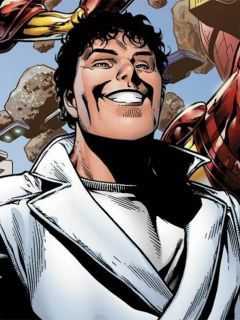

In [65]:
Beyonder = df.query("name == 'Beyonder'")
Beyonder_img = "https://www.superherodb.com" + Beyonder['img'].values[0]
Disp.Image(requests.get(Beyonder_img).content)

In [66]:
display_matches(infinite_df.text.loc[153])

In [67]:
display_matches(infinite_df.text.loc[845])

In [68]:
display_matches(infinite_df.text.loc[450])

In [69]:
display_matches(infinite_df.text.loc[526])

# Combined Final Score

After the construction of three measurements of powerfulness, perhaps we should combine them into a final score. As the three are in different ranges, I first standardize the three scores and use Min-Max scaling to transform the range of the scores from 0 to 1, then take averages of the three transformed scores to make the final "weighted score".

In [70]:
s_scaler=StandardScaler()
m_scaler=MinMaxScaler()
infinite_df['weighted_score'] = (m_scaler.fit_transform(s_scaler.fit_transform(infinite_df.infinity_score.to_frame())) + 
                        m_scaler.fit_transform(s_scaler.fit_transform(infinite_df.projected_score.to_frame())) + 
                        m_scaler.fit_transform(s_scaler.fit_transform(infinite_df.text_score.to_frame())))/3

In [71]:
infinite_df['weighted_score'] = (m_scaler.fit_transform(infinite_df.infinity_score.to_frame()) + 
                        m_scaler.fit_transform(infinite_df.projected_score.to_frame()) + 
                        m_scaler.fit_transform(infinite_df.text_score.to_frame()))/3

In [72]:
infinite_df.sort_values(by='weighted_score', ascending=False)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score,projected_score,text,text_score,weighted_score
153,Beyonder,NaN,NaN,299,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,0.0,1.0,1.0,89,590,0.999684,329.220913,"Within a pocket realm in the Negative Zone, th...",2.0,0.964265
450,Eru Iluvatar,Eru,NaN,299,Eru is the supreme deity of Arda. He was the s...,NA,100,100,100,100,...,0.0,0.0,0.0,28,600,0.998188,338.551547,Eru is the supreme deity of Arda. He was the s...,1.0,0.892293
1337,True Form Oblivion,Oblivion,Oblivion,299,NA,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,1.0,1.0,1.0,103,600,0.999567,321.815309,"NA ""Now don't think badly of me: I can't help ...",1.0,0.877218
845,Man Of Miracles,Mother Of Existence,Mother Of Existence,299,The being known as Mother is the creator of t...,NA,100,100,100,100,...,1.0,1.0,1.0,54,600,0.998526,293.784491,The being known as Mother is the creator of t...,2.0,0.821556
803,Little Krishna,Krishna,Krishna,299,NA,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,1.0,1.0,1.0,67,600,0.999364,291.181162,NA Nigh-Omnipotence Krishna is the 8th avatar ...,1.5,0.805852
526,Golden Master's Mech,Overlord,NaN,299,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,0.0,106,600,0.999922,311.438838,While some of the Nindroids under Cryptor retr...,-0.5,0.763372
809,Living Tribunal,NaN,NaN,299,NA,The Living Tribunal was the embodiment of the...,100,100,100,100,...,0.0,1.0,1.0,86,600,0.999716,303.324517,NA The Living Tribunal was the embodiment of ...,0.0,0.762614
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,0.0,1.0,1.0,126,565,0.998575,281.092794,"A teenage girl with an interest in magick, Lor...",1.0,0.722439
1202,Spectre Oversoul,Aztar,Aztar,299,NA,"As a servant of God, The Spectre is granted l...",100,100,100,100,...,1.0,0.0,1.0,71,580,0.999486,246.784159,"NA As a servant of God, The Spectre is grante...",0.5,0.609170
1281,The Golden Master,Overlord,Overlord,299,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,97,600,0.997636,268.605866,The Golden Master is an ancient figure of evil...,0.0,0.597118


In [73]:
infinite_df.loc[df.alignment=='Good'].sort_values(by='weighted_score', ascending=False)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score,projected_score,text,text_score,weighted_score
450,Eru Iluvatar,Eru,NaN,299,Eru is the supreme deity of Arda. He was the s...,NA,100,100,100,100,...,0.0,0.0,0.0,28,600,0.998188,338.551547,Eru is the supreme deity of Arda. He was the s...,1.0,0.892293
803,Little Krishna,Krishna,Krishna,299,NA,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,1.0,1.0,1.0,67,600,0.999364,291.181162,NA Nigh-Omnipotence Krishna is the 8th avatar ...,1.5,0.805852
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,0.0,1.0,1.0,126,565,0.998575,281.092794,"A teenage girl with an interest in magick, Lor...",1.0,0.722439
1202,Spectre Oversoul,Aztar,Aztar,299,NA,"As a servant of God, The Spectre is granted l...",100,100,100,100,...,1.0,0.0,1.0,71,580,0.999486,246.784159,"NA As a servant of God, The Spectre is grante...",0.5,0.609170
1272,The Beyonder (Earth-1298),Beyonder,Beyonder,299,Known as the Beyonder due to the fact that he ...,NA,100,100,100,100,...,1.0,1.0,1.0,62,550,0.997475,267.588262,Known as the Beyonder due to the fact that he ...,-1.5,0.498639
482,First Spinjitzu Master,Unknown,Unknown,299,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,84,600,0.996220,253.279514,"Long before time had a name, the First Spinjit...",-0.5,0.480261
1289,The Lord Of Light,R'hllor,NaN,299,"Melisandre, a Red Priestess of the Lord of Lig...",NA,100,100,100,100,...,0.0,0.0,0.0,26,600,0.998687,277.686352,"Melisandre, a Red Priestess of the Lord of Lig...",-3.0,0.472372
795,Life Entity,The Life Entity,NaN,299,NA,Powers It's the manifested form of life and c...,100,100,100,100,...,1.0,1.0,1.0,25,600,0.993258,252.358016,NA Powers It's the manifested form of life an...,-0.5,0.396897


In [74]:
infinite_df.loc[df.creator=='Marvel Comics'].sort_values(by='weighted_score', ascending=False)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score,projected_score,text,text_score,weighted_score
153,Beyonder,NaN,NaN,299,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,0.0,1.0,1.0,89,590,0.999684,329.220913,"Within a pocket realm in the Negative Zone, th...",2.0,0.964265
1337,True Form Oblivion,Oblivion,Oblivion,299,NA,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,1.0,1.0,1.0,103,600,0.999567,321.815309,"NA ""Now don't think badly of me: I can't help ...",1.0,0.877218
809,Living Tribunal,NaN,NaN,299,NA,The Living Tribunal was the embodiment of the...,100,100,100,100,...,0.0,1.0,1.0,86,600,0.999716,303.324517,NA The Living Tribunal was the embodiment of ...,0.0,0.762614
1272,The Beyonder (Earth-1298),Beyonder,Beyonder,299,Known as the Beyonder due to the fact that he ...,NA,100,100,100,100,...,1.0,1.0,1.0,62,550,0.997475,267.588262,Known as the Beyonder due to the fact that he ...,-1.5,0.498639
1290,The One Below All,Unknown,NaN,299,NA,The One Below All is the source of the mutagen...,100,100,100,100,...,1.0,1.0,1.0,57,600,0.996863,248.510886,NA The One Below All is the source of the muta...,-1.5,0.422147
11,Abraxas,Abraxas,Abraxas,299,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",100,100,100,100,...,1.0,0.0,1.0,23,600,0.987650,234.082243,"Born within the abstract entity Eternity, Abra...",0.5,0.247805


In [75]:
infinite_df.loc[df.creator=='DC Comics'].sort_values(by='weighted_score', ascending=False)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_stamina,has_agility,has_super_strength,superpower_count,combined_score,infinity_score,projected_score,text,text_score,weighted_score
174,Black Alice,Lori Zechlin,Lori Zechlin,299,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,0.0,1.0,1.0,126,565,0.998575,281.092794,"A teenage girl with an interest in magick, Lor...",1.0,0.722439
1202,Spectre Oversoul,Aztar,Aztar,299,NA,"As a servant of God, The Spectre is granted l...",100,100,100,100,...,1.0,0.0,1.0,71,580,0.999486,246.784159,"NA As a servant of God, The Spectre is grante...",0.5,0.609170
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,299,"Many years ago, during Lucifer's rebellion in ...",The archangel Michael Demuirgos is the second ...,100,100,100,100,...,1.0,1.0,1.0,71,600,0.999178,287.825036,"Many years ago, during Lucifer's rebellion in ...",-3.5,0.487223
795,Life Entity,The Life Entity,NaN,299,NA,Powers It's the manifested form of life and c...,100,100,100,100,...,1.0,1.0,1.0,25,600,0.993258,252.358016,NA Powers It's the manifested form of life an...,-0.5,0.396897
376,Death Of The Endless,Death,Death Of The Endless,299,Death of the Endless came into existence short...,Personification of Death: One of the seven End...,100,100,100,100,...,1.0,1.0,1.0,58,550,0.994699,232.368081,Death of the Endless came into existence short...,-3.5,0.191467


Beyonder edges out Eru Iluvatar in the final score, and also becomes the most powerful character in Marvel's universe. While Beyonder is not listed to be omnipotent in the dataset, he has enough high scoring superpowers to make him taking the third and the second spots in the classification and regression models, and the text score propels him to the top spot. But there is one more issue: Beyonder is listed as neutral in alignment. If we restrict to the "good" superheros, then the most powerful comes to Eru Iluvatar. And Black Alice is ranked as the most powerful in DC Comics' Universe.

# Coda
Apparently SHDb has overhauled the scoring system and the assessment of many characters since this dataset was scraped from it about two years ago. At present the list of infinite class characters is nearly completely different from this dataset, only Eru Iluvatar is on both lists. The overall score now can be in millions or even billions, while the six power stats can be infinite. And TIER is introduced in the calculation, where characters in TIER infinite have infinite overall scores. SHDb also reveals the present formula of calculating the overall score, which is quite complex:

>  ( INT^1.3 + (STR*0.5 )^2 + (SPE*0.5)^2 + DUR^1.6 + (POW + (SPS*SPL))^2 + COM^1.8 ) ^ TIER

where
INT: intelligence, STR: Strength, SPE: Speed, DUR: Durability, POW: Power, SPS: Superpower Score, SPL: Superpower Level, COM: Combat

And a note states that:
> Every Super Power has a score (SPS) that is used to calculate the Class. Each Super Power also has 3 levels (SPL). The level is set when connecting that Super Power to a character. The level determines the final score, of the Super Power, being used in the calculation.